In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Load the dataset (replace 'data.csv' with your actual file path)
data = pd.read_csv('ITC.csv')

# Ensure the 'Date' column is in datetime format and sort the data by date
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)

# Splitting the data into features (X) and target (y)
X = data[["Open", "High", "Low", "Volume"]].values
y = data["Close"].values

# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Splitting into training and testing sets (time series split)
train_size = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]
date_train, date_test = data['Date'].iloc[:train_size], data['Date'].iloc[train_size:]

# Reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Predicting the stock prices
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Inverse transform predictions and actual values
y_train_pred = scaler_y.inverse_transform(y_train_pred)
y_test_pred = scaler_y.inverse_transform(y_test_pred)
y_train_actual = scaler_y.inverse_transform(y_train)
y_test_actual = scaler_y.inverse_transform(y_test)

# Calculate RMSE
train_rmse = sqrt(mean_squared_error(y_train_actual, y_train_pred))
test_rmse = sqrt(mean_squared_error(y_test_actual, y_test_pred))
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Epoch 1/50
61/61 [==============================] - 8s 13ms/step - loss: 0.0254
Epoch 2/50
61/61 [==============================] - 1s 10ms/step - loss: 0.0030
Epoch 3/50
61/61 [==============================] - 0s 7ms/step - loss: 7.3759e-04
Epoch 4/50
61/61 [==============================] - 0s 7ms/step - loss: 1.7354e-04
Epoch 5/50
61/61 [==============================] - 0s 7ms/step - loss: 1.0095e-04
Epoch 6/50
61/61 [==============================] - 1s 9ms/step - loss: 8.2452e-05
Epoch 7/50
61/61 [==============================] - 0s 7ms/step - loss: 7.6914e-05
Epoch 8/50
61/61 [==============================] - 0s 7ms/step - loss: 7.2530e-05
Epoch 9/50
61/61 [==============================] - 0s 7ms/step - loss: 6.5901e-05
Epoch 10/50
61/61 [==============================] - 0s 8ms/step - loss: 6.1344e-05
Epoch 11/50
61/61 [==============================] - 1s 9ms/step - loss: 5.9294e-05
Epoch 12/50
61/61 [==============================] - 0s 7ms/step - loss: 5.4203e-05
Epoch 1

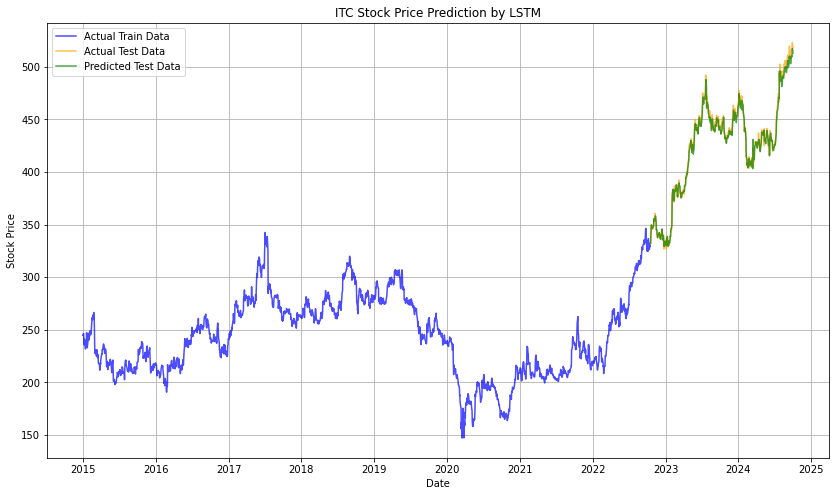

In [2]:
# Visualization of Actual vs Predicted with Date
plt.figure(figsize=(14, 8))

# Plot training data
plt.plot(date_train, y_train_actual, label="Actual Train Data", color='blue', alpha=0.7)
#plt.plot(date_train, y_train_pred, label="Predicted Train Data", color='cyan', alpha=0.7)

# Plot test data
plt.plot(date_test, y_test_actual, label="Actual Test Data", color='orange', alpha=0.7)
plt.plot(date_test, y_test_pred, label="Predicted Test Data", color='green', alpha=0.7)

# Formatting the plot
plt.title("ITC Stock Price Prediction by LSTM")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Load the dataset (replace 'data.csv' with your actual file path)
data = pd.read_csv('HINDUNILVR.csv')

# Ensure the 'Date' column is in datetime format and sort the data by date
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)

# Splitting the data into features (X) and target (y)
X = data[["Open", "High", "Low", "Volume"]].values
y = data["Close"].values

# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Splitting into training and testing sets (time series split)
train_size = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]
date_train, date_test = data['Date'].iloc[:train_size], data['Date'].iloc[train_size:]

# Reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Predicting the stock prices
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Inverse transform predictions and actual values
y_train_pred = scaler_y.inverse_transform(y_train_pred)
y_test_pred = scaler_y.inverse_transform(y_test_pred)
y_train_actual = scaler_y.inverse_transform(y_train)
y_test_actual = scaler_y.inverse_transform(y_test)

# Calculate RMSE
train_rmse = sqrt(mean_squared_error(y_train_actual, y_train_pred))
test_rmse = sqrt(mean_squared_error(y_test_actual, y_test_pred))
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")



Epoch 1/50
61/61 [==============================] - 3s 13ms/step - loss: 0.1006
Epoch 2/50
61/61 [==============================] - 1s 11ms/step - loss: 0.0160
Epoch 3/50
61/61 [==============================] - 0s 8ms/step - loss: 0.0026
Epoch 4/50
61/61 [==============================] - 0s 6ms/step - loss: 7.7594e-04
Epoch 5/50
61/61 [==============================] - 0s 7ms/step - loss: 6.3367e-04
Epoch 6/50
61/61 [==============================] - 0s 7ms/step - loss: 5.2732e-04
Epoch 7/50
61/61 [==============================] - 1s 8ms/step - loss: 4.4110e-04
Epoch 8/50
61/61 [==============================] - 0s 7ms/step - loss: 3.4061e-04
Epoch 9/50
61/61 [==============================] - 0s 7ms/step - loss: 2.6796e-04
Epoch 10/50
61/61 [==============================] - 0s 7ms/step - loss: 2.1298e-04
Epoch 11/50
61/61 [==============================] - 1s 8ms/step - loss: 1.5797e-04
Epoch 12/50
61/61 [==============================] - 0s 7ms/step - loss: 1.2707e-04
Epoch 13/50

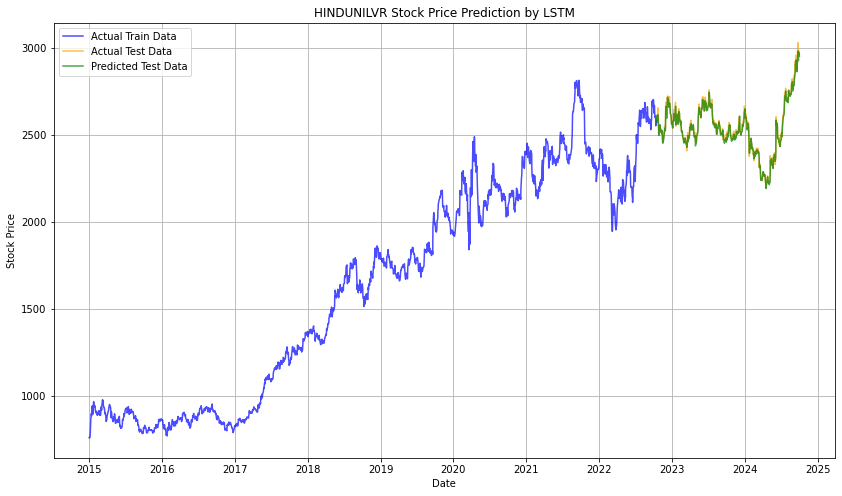

In [4]:
# Visualization of Actual vs Predicted with Date
plt.figure(figsize=(14, 8))

# Plot training data
plt.plot(date_train, y_train_actual, label="Actual Train Data", color='blue', alpha=0.7)
#plt.plot(date_train, y_train_pred, label="Predicted Train Data", color='cyan', alpha=0.7)

# Plot test data
plt.plot(date_test, y_test_actual, label="Actual Test Data", color='orange', alpha=0.7)
plt.plot(date_test, y_test_pred, label="Predicted Test Data", color='green', alpha=0.7)

# Formatting the plot
plt.title("HINDUNILVR Stock Price Prediction by LSTM")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Load the dataset (replace 'data.csv' with your actual file path)
data = pd.read_csv('TATACONSUM.csv')

# Ensure the 'Date' column is in datetime format and sort the data by date
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)

# Splitting the data into features (X) and target (y)
X = data[["Open", "High", "Low", "Volume"]].values
y = data["Close"].values

# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Splitting into training and testing sets (time series split)
train_size = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]
date_train, date_test = data['Date'].iloc[:train_size], data['Date'].iloc[train_size:]

# Reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Predicting the stock prices
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Inverse transform predictions and actual values
y_train_pred = scaler_y.inverse_transform(y_train_pred)
y_test_pred = scaler_y.inverse_transform(y_test_pred)
y_train_actual = scaler_y.inverse_transform(y_train)
y_test_actual = scaler_y.inverse_transform(y_test)

# Calculate RMSE
train_rmse = sqrt(mean_squared_error(y_train_actual, y_train_pred))
test_rmse = sqrt(mean_squared_error(y_test_actual, y_test_pred))
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Epoch 1/50
60/60 [==============================] - 3s 12ms/step - loss: 0.0377
Epoch 2/50
60/60 [==============================] - 1s 11ms/step - loss: 0.0037
Epoch 3/50
60/60 [==============================] - 1s 9ms/step - loss: 1.8038e-04
Epoch 4/50
60/60 [==============================] - 0s 6ms/step - loss: 1.5402e-04
Epoch 5/50
60/60 [==============================] - 0s 6ms/step - loss: 1.3506e-04
Epoch 6/50
60/60 [==============================] - 0s 6ms/step - loss: 1.1784e-04
Epoch 7/50
60/60 [==============================] - 0s 6ms/step - loss: 1.0138e-04
Epoch 8/50
60/60 [==============================] - 0s 6ms/step - loss: 8.8572e-05
Epoch 9/50
60/60 [==============================] - 0s 6ms/step - loss: 7.8141e-05
Epoch 10/50
60/60 [==============================] - 0s 8ms/step - loss: 6.2903e-05
Epoch 11/50
60/60 [==============================] - 0s 6ms/step - loss: 5.2178e-05
Epoch 12/50
60/60 [==============================] - 0s 7ms/step - loss: 4.4819e-05
Epoch 1

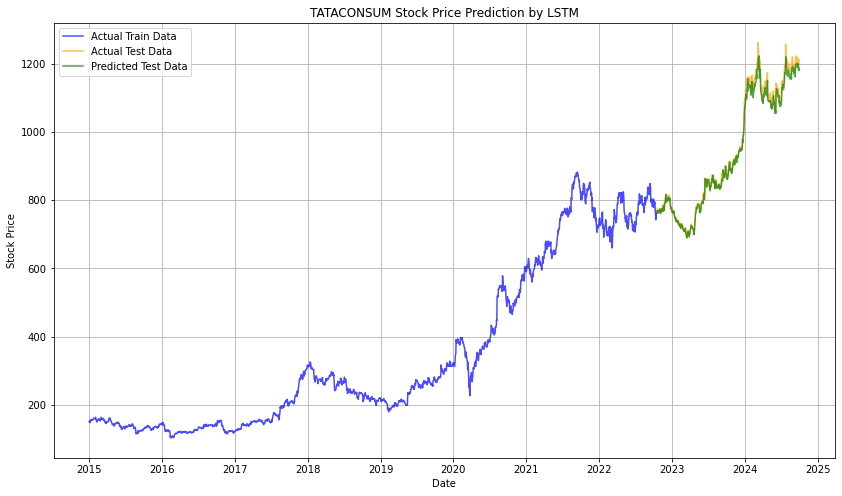

In [6]:
# Visualization of Actual vs Predicted with Date
plt.figure(figsize=(14, 8))

# Plot training data
plt.plot(date_train, y_train_actual, label="Actual Train Data", color='blue', alpha=0.7)
#plt.plot(date_train, y_train_pred, label="Predicted Train Data", color='cyan', alpha=0.7)

# Plot test data
plt.plot(date_test, y_test_actual, label="Actual Test Data", color='orange', alpha=0.7)
plt.plot(date_test, y_test_pred, label="Predicted Test Data", color='green', alpha=0.7)

# Formatting the plot
plt.title("TATACONSUM Stock Price Prediction by LSTM")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Load the dataset (replace 'data.csv' with your actual file path)
data = pd.read_csv('BRITANNIA.csv')

# Ensure the 'Date' column is in datetime format and sort the data by date
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)

# Splitting the data into features (X) and target (y)
X = data[["Open", "High", "Low", "Volume"]].values
y = data["Close"].values

# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Splitting into training and testing sets (time series split)
train_size = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]
date_train, date_test = data['Date'].iloc[:train_size], data['Date'].iloc[train_size:]

# Reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Predicting the stock prices
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Inverse transform predictions and actual values
y_train_pred = scaler_y.inverse_transform(y_train_pred)
y_test_pred = scaler_y.inverse_transform(y_test_pred)
y_train_actual = scaler_y.inverse_transform(y_train)
y_test_actual = scaler_y.inverse_transform(y_test)

# Calculate RMSE
train_rmse = sqrt(mean_squared_error(y_train_actual, y_train_pred))
test_rmse = sqrt(mean_squared_error(y_test_actual, y_test_pred))
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Epoch 1/50
61/61 [==============================] - 3s 7ms/step - loss: 0.0491
Epoch 2/50
61/61 [==============================] - 0s 7ms/step - loss: 0.0048
Epoch 3/50
61/61 [==============================] - 1s 10ms/step - loss: 8.5437e-04
Epoch 4/50
61/61 [==============================] - 1s 11ms/step - loss: 1.8820e-04
Epoch 5/50
61/61 [==============================] - 1s 10ms/step - loss: 1.4338e-04
Epoch 6/50
61/61 [==============================] - 1s 9ms/step - loss: 1.2583e-04
Epoch 7/50
61/61 [==============================] - 1s 10ms/step - loss: 1.1268e-04
Epoch 8/50
61/61 [==============================] - 1s 9ms/step - loss: 9.6025e-05
Epoch 9/50
61/61 [==============================] - 1s 9ms/step - loss: 8.4114e-05
Epoch 10/50
61/61 [==============================] - 1s 10ms/step - loss: 7.1323e-05
Epoch 11/50
61/61 [==============================] - 0s 7ms/step - loss: 6.5325e-05
Epoch 12/50
61/61 [==============================] - 0s 7ms/step - loss: 5.1136e-05
Epoc

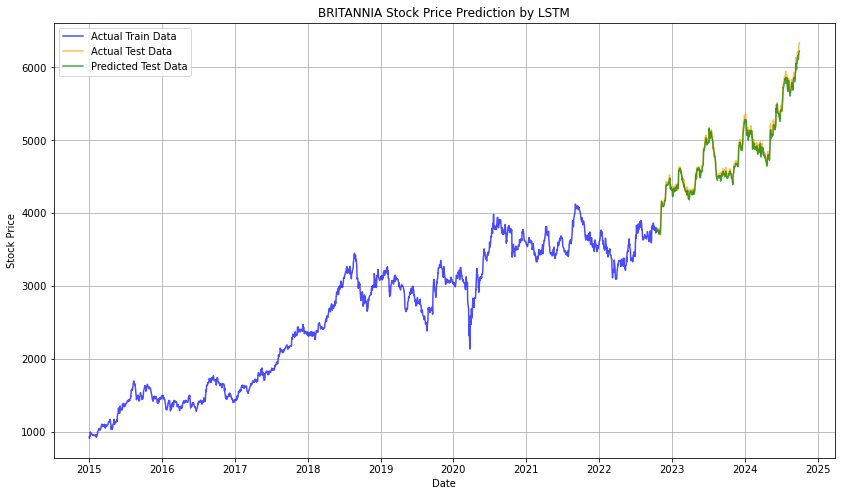

In [8]:
# Visualization of Actual vs Predicted with Date
plt.figure(figsize=(14, 8))

# Plot training data
plt.plot(date_train, y_train_actual, label="Actual Train Data", color='blue', alpha=0.7)
#plt.plot(date_train, y_train_pred, label="Predicted Train Data", color='cyan', alpha=0.7)

# Plot test data
plt.plot(date_test, y_test_actual, label="Actual Test Data", color='orange', alpha=0.7)
plt.plot(date_test, y_test_pred, label="Predicted Test Data", color='green', alpha=0.7)

# Formatting the plot
plt.title("BRITANNIA Stock Price Prediction by LSTM")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Load the dataset (replace 'data.csv' with your actual file path)
data = pd.read_csv('NESTLEIND.csv')

# Ensure the 'Date' column is in datetime format and sort the data by date
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)

# Splitting the data into features (X) and target (y)
X = data[["Open", "High", "Low", "Volume"]].values
y = data["Close"].values

# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Splitting into training and testing sets (time series split)
train_size = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]
date_train, date_test = data['Date'].iloc[:train_size], data['Date'].iloc[train_size:]

# Reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Predicting the stock prices
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Inverse transform predictions and actual values
y_train_pred = scaler_y.inverse_transform(y_train_pred)
y_test_pred = scaler_y.inverse_transform(y_test_pred)
y_train_actual = scaler_y.inverse_transform(y_train)
y_test_actual = scaler_y.inverse_transform(y_test)

# Calculate RMSE
train_rmse = sqrt(mean_squared_error(y_train_actual, y_train_pred))
test_rmse = sqrt(mean_squared_error(y_test_actual, y_test_pred))
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Epoch 1/50
61/61 [==============================] - 4s 11ms/step - loss: 0.0555
Epoch 2/50
61/61 [==============================] - 1s 8ms/step - loss: 0.0041
Epoch 3/50
61/61 [==============================] - 0s 8ms/step - loss: 2.7904e-04
Epoch 4/50
61/61 [==============================] - 0s 8ms/step - loss: 1.9850e-04
Epoch 5/50
61/61 [==============================] - 0s 7ms/step - loss: 1.7265e-04
Epoch 6/50
61/61 [==============================] - 0s 7ms/step - loss: 1.4857e-04
Epoch 7/50
61/61 [==============================] - 0s 8ms/step - loss: 1.2727e-04
Epoch 8/50
61/61 [==============================] - 0s 7ms/step - loss: 1.0743e-04
Epoch 9/50
61/61 [==============================] - 0s 7ms/step - loss: 8.8310e-05
Epoch 10/50
61/61 [==============================] - 0s 8ms/step - loss: 7.1734e-05
Epoch 11/50
61/61 [==============================] - 0s 7ms/step - loss: 6.1554e-05
Epoch 12/50
61/61 [==============================] - 0s 7ms/step - loss: 4.9994e-05
Epoch 13

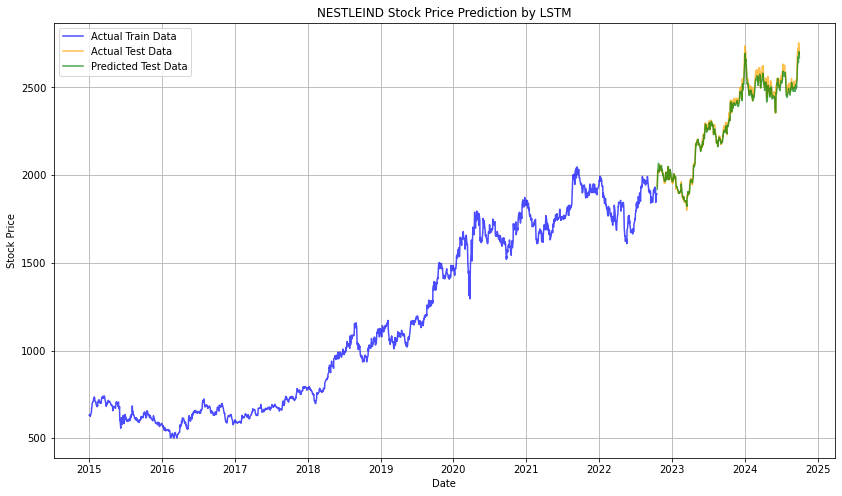

In [10]:
# Visualization of Actual vs Predicted with Date
plt.figure(figsize=(14, 8))

# Plot training data
plt.plot(date_train, y_train_actual, label="Actual Train Data", color='blue', alpha=0.7)
#plt.plot(date_train, y_train_pred, label="Predicted Train Data", color='cyan', alpha=0.7)

# Plot test data
plt.plot(date_test, y_test_actual, label="Actual Test Data", color='orange', alpha=0.7)
plt.plot(date_test, y_test_pred, label="Predicted Test Data", color='green', alpha=0.7)

# Formatting the plot
plt.title("NESTLEIND Stock Price Prediction by LSTM")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()